# MultiProFit-COSMOS: 

This notebook plots results from fitting galaxies from the COSMOS survey (http://cosmos.astro.caltech.edu/) with MultiProFit (https://github.com/lsst-dm/multiprofit). This investigation is to help determine what kind of galaxy models LSST Data Management should fit for annual Data Releases, where we would like to fit the best possible model(s) but will be constrained in computing time by the overwhelming size of the dataset (billions of objects).

## Introduction and motivation

See [this notebook](https://github.com/lsst-dm/modelling_research/blob/master/jupyternotebooks/cosmos_hst_analysis.ipynb) for general background and motivation.

## Browsing this notebook

I recommend using jupyter's nbviewer page to browse through this notebook. For example, you can use it to open the [N=4 GMM](https://nbviewer.jupyter.org/github/lsst-dm/modelling_research/blob/master/jupyternotebooks/cosmos_hst_analysis.ipynb#COSMOS-HST:-MultiProFit-Sersic-vs-MultiProFit-MGA-Sersic-(N=4) and compare to the [N=8 GMM](https://nbviewer.jupyter.org/github/lsst-dm/modelling_research/blob/master/jupyternotebooks/cosmos_hst_analysis.ipynb#COSMOS-HST:-MultiProFit-Sersic-vs-MultiProFit-MGA-Sersic-(N=8) side-by-side.

### Import required packages

Import required packages and set matplotlib/seaborn defaults for slightly nicer plots.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import seaborn as sns

In [2]:
# Setup for plotting
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['figure.dpi'] = 160
mpl.rcParams['image.origin'] = 'lower'
sns.set(rc={'axes.facecolor': '0.85', 'figure.facecolor': 'w'})

### Read the table with the results

In [3]:
from modelling_research.plot_multiprofit_cosmos import readtable
filename = '../data/multiprofit-cosmos-fits.csv'
tab = readtable(filename)

### Size-flux relations in HST

/software/lsstsw/stack_20190330/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


0 not finite out of 921 for src=hst
11 not finite out of 921 for src=hst2hsc


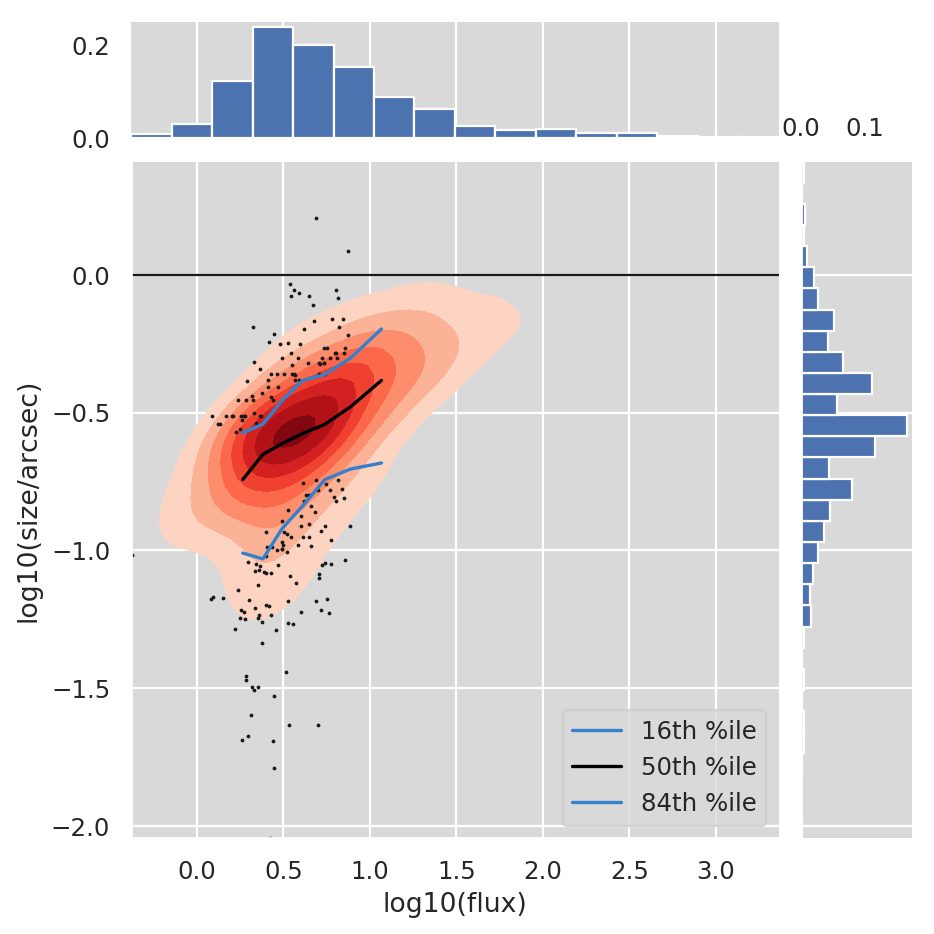

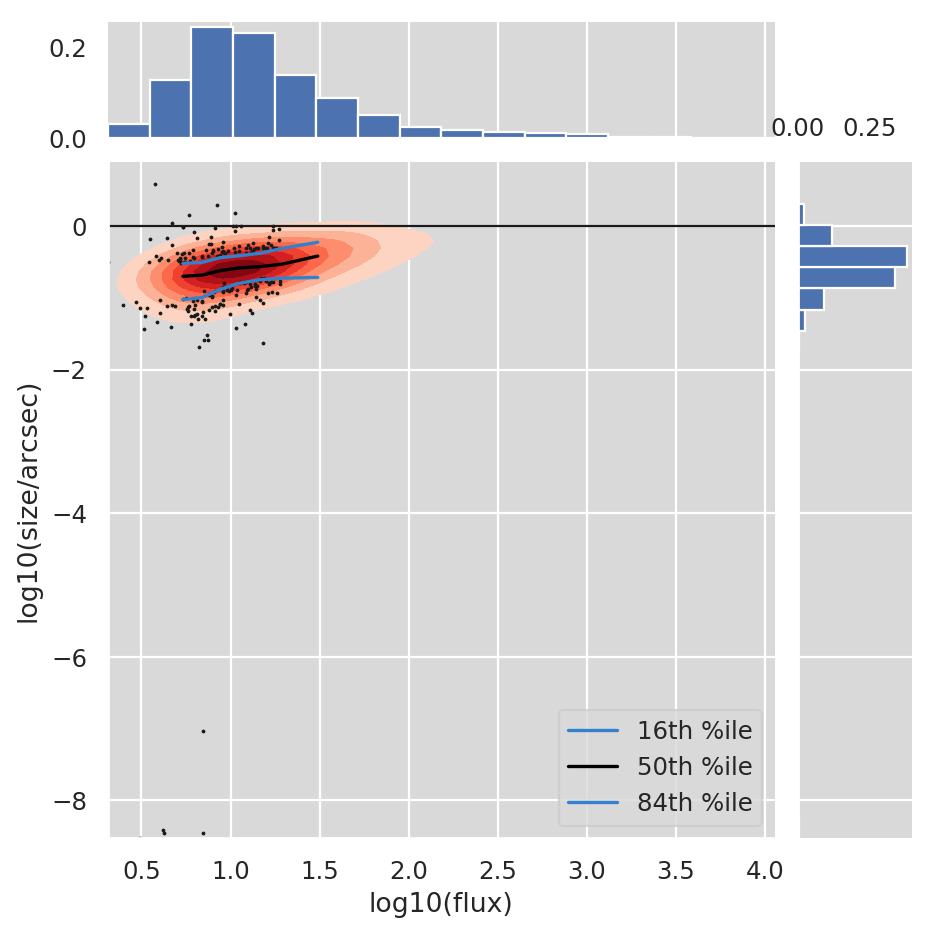

In [4]:
from modelling_research.plotting import plotjoint_running_percentiles
argspj = dict(
    percentiles = [16, 50, 84],
    percentilecolours = [(0.2, 0.5, 0.8), (0., 0., 0.), (0.2, 0.5, 0.8)],
    labelx='log10(flux)',
    labely='log10(size/arcsec)',
)
for src in ['hst', 'hst2hsc']:
    x = np.log10(tab['profit.' + src + '.serbpx.flux.1'])
    y = np.log10(tab['profit.' + src + '.serbpx.re.1.1'])
    isfinite = np.isfinite(x) * np.isfinite(y)
    print('{} not finite out of {} for src={}'.format(len(x)-np.sum(isfinite), len(x), src))
    plotjoint_running_percentiles(x[isfinite], y[isfinite], nbins=8, **argspj)

### Size-flux relations compared between different Sersic models

Are there correlations between the sizes/fluxes of Gaussian/exponential/n=2/de Vaucouleurs profiles? If so, they could be used to improve

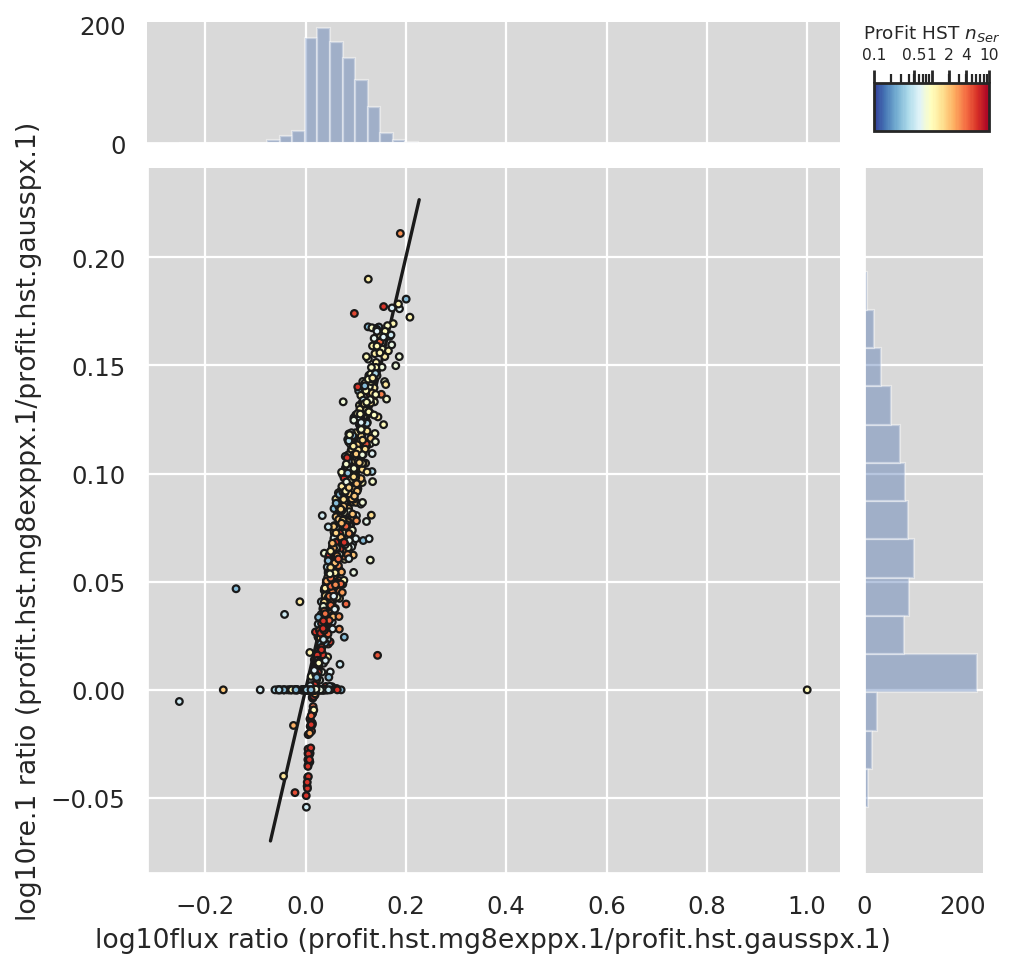

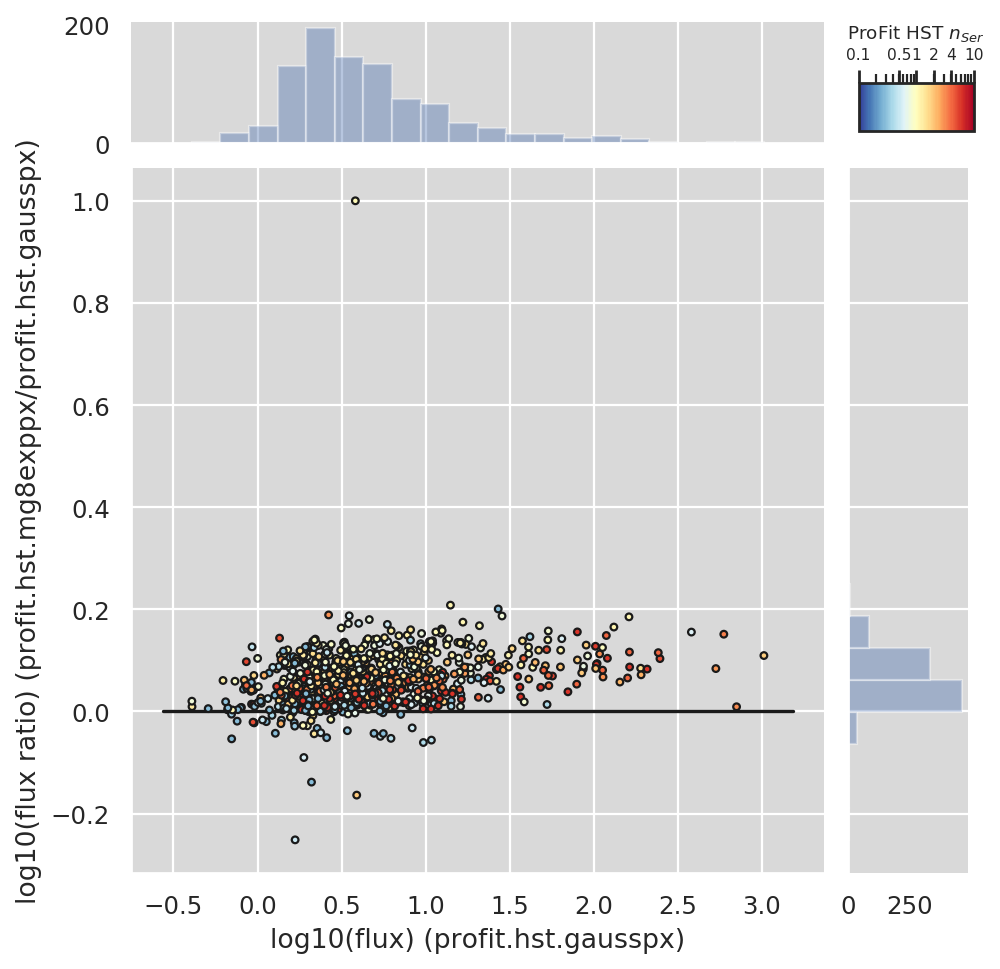

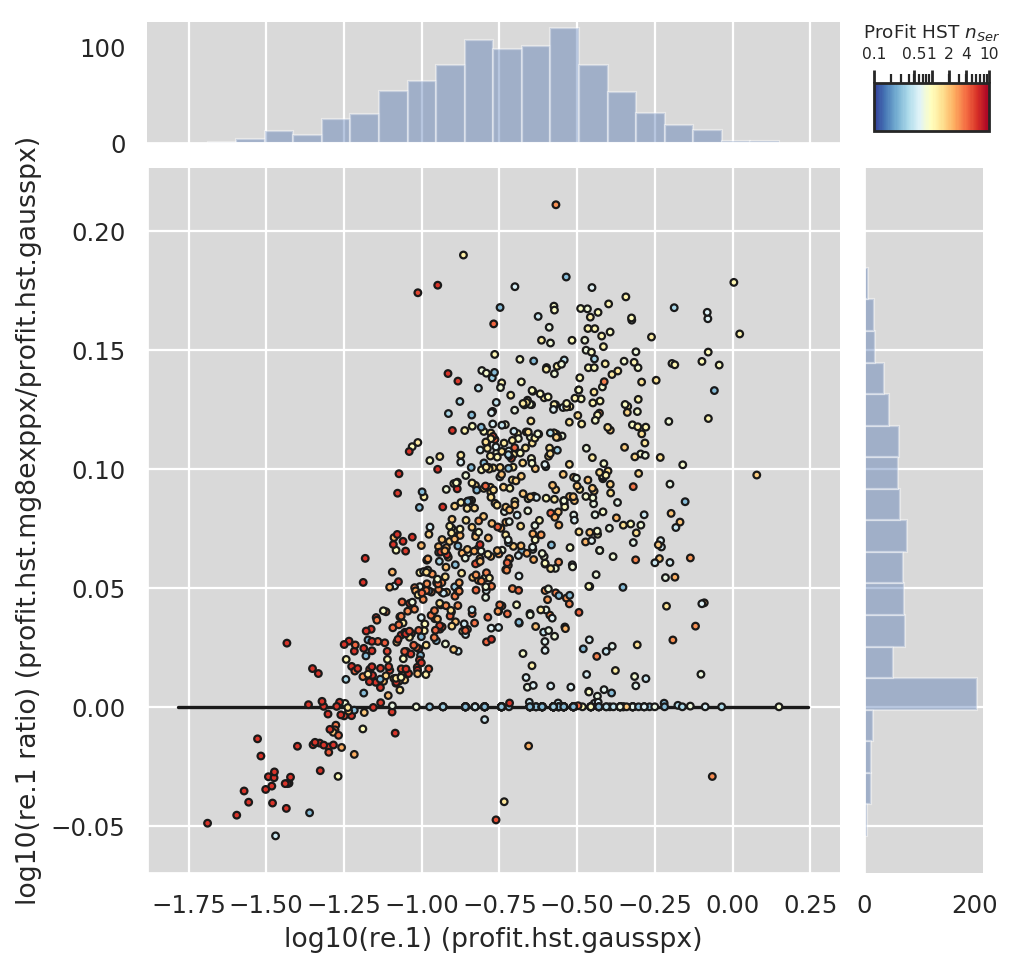

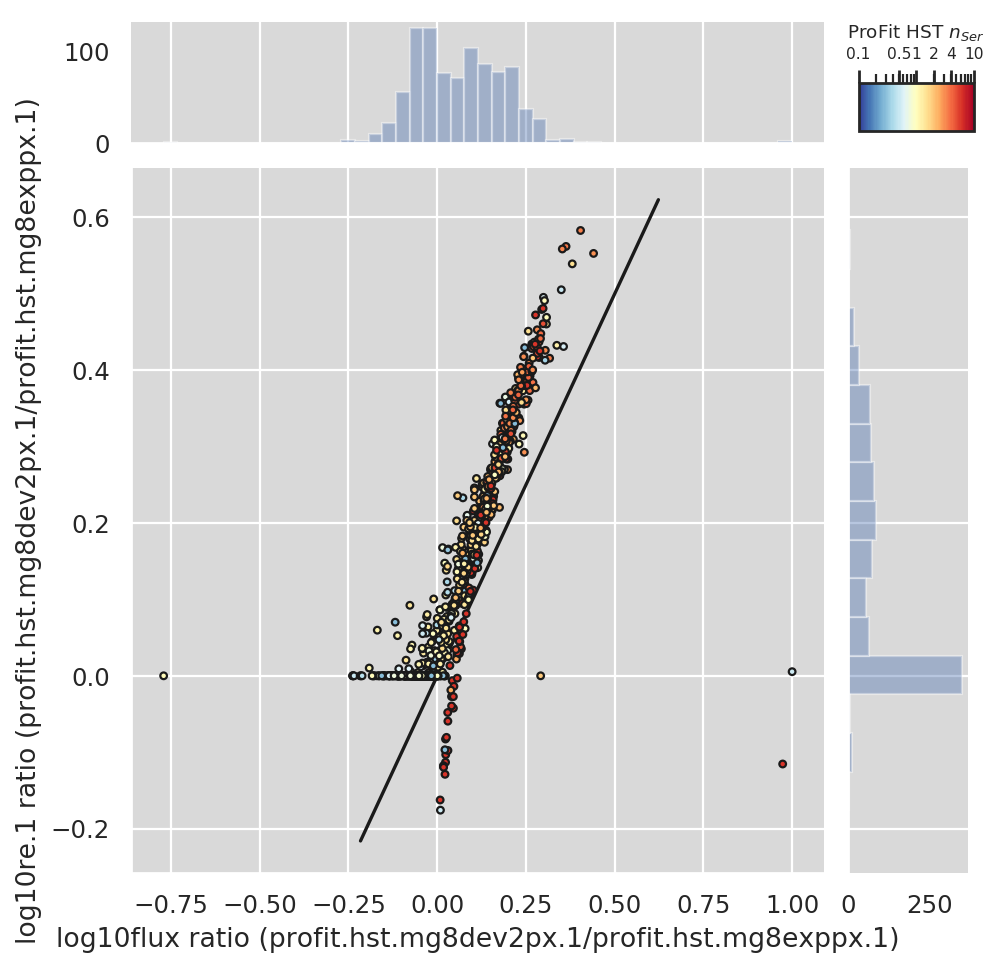

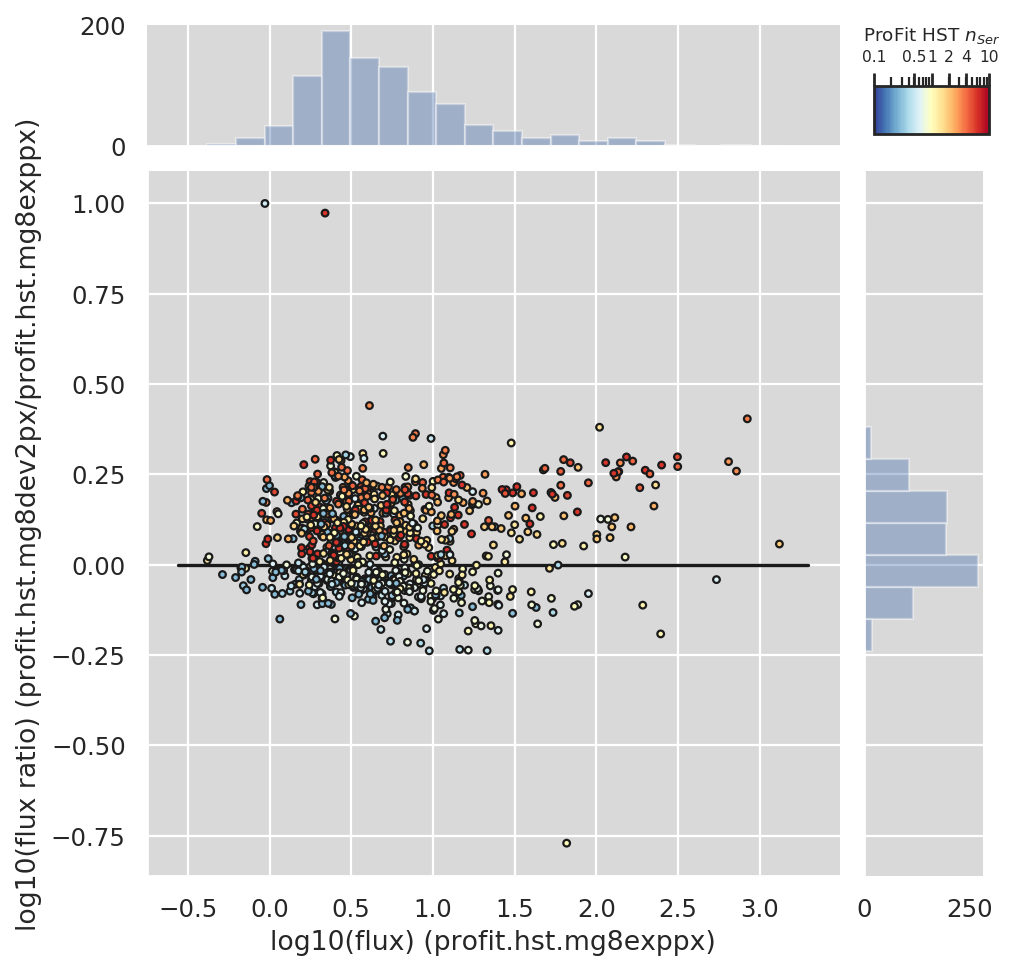

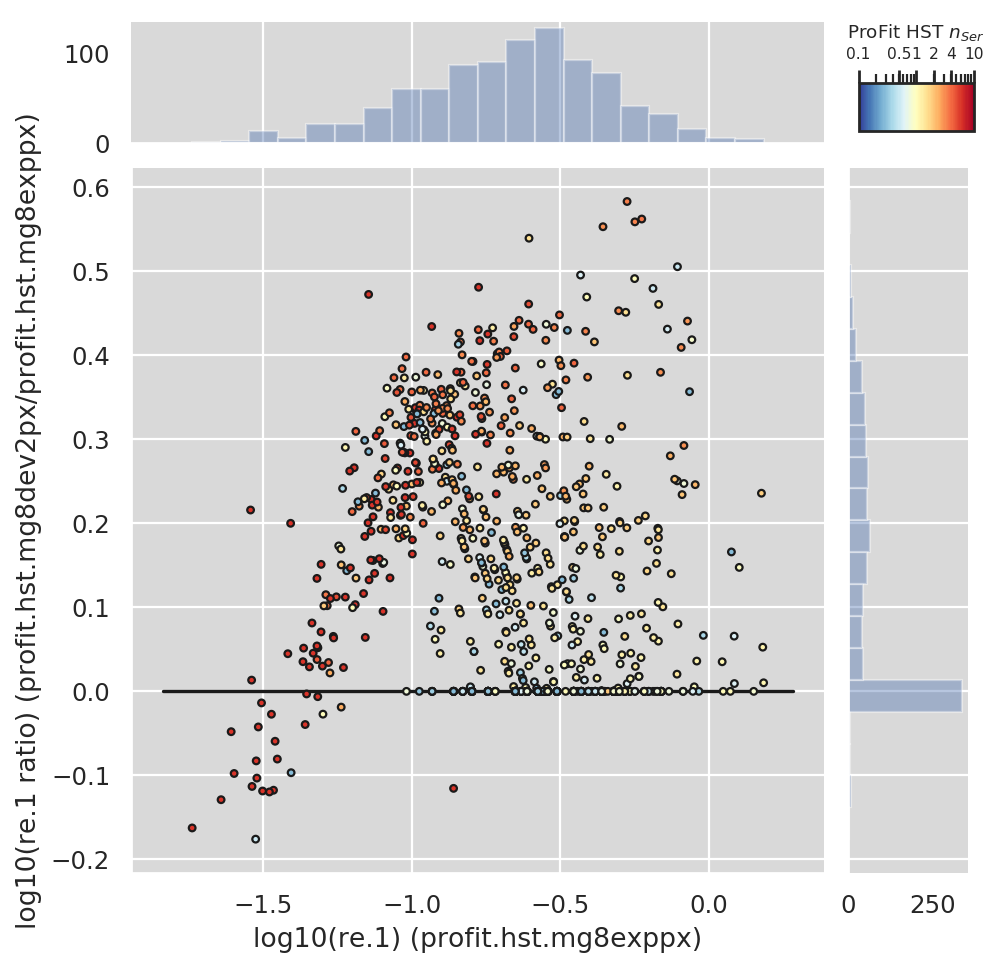

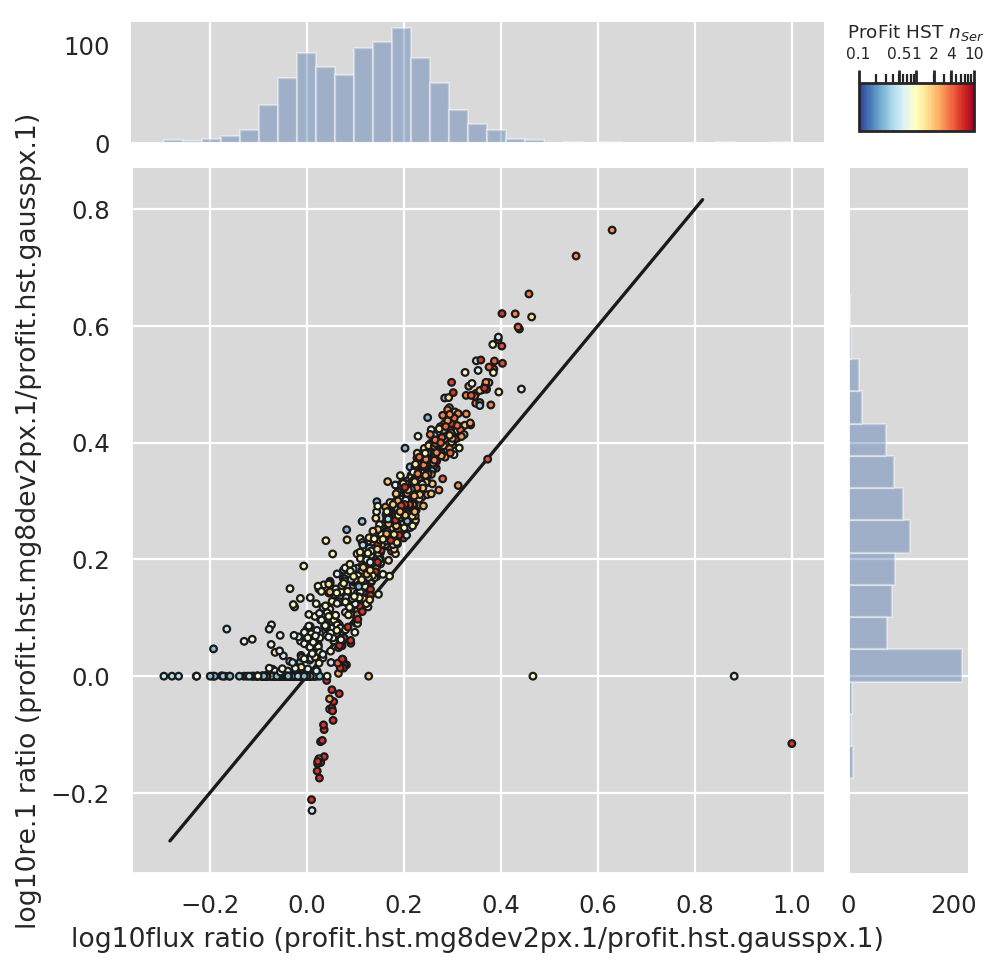

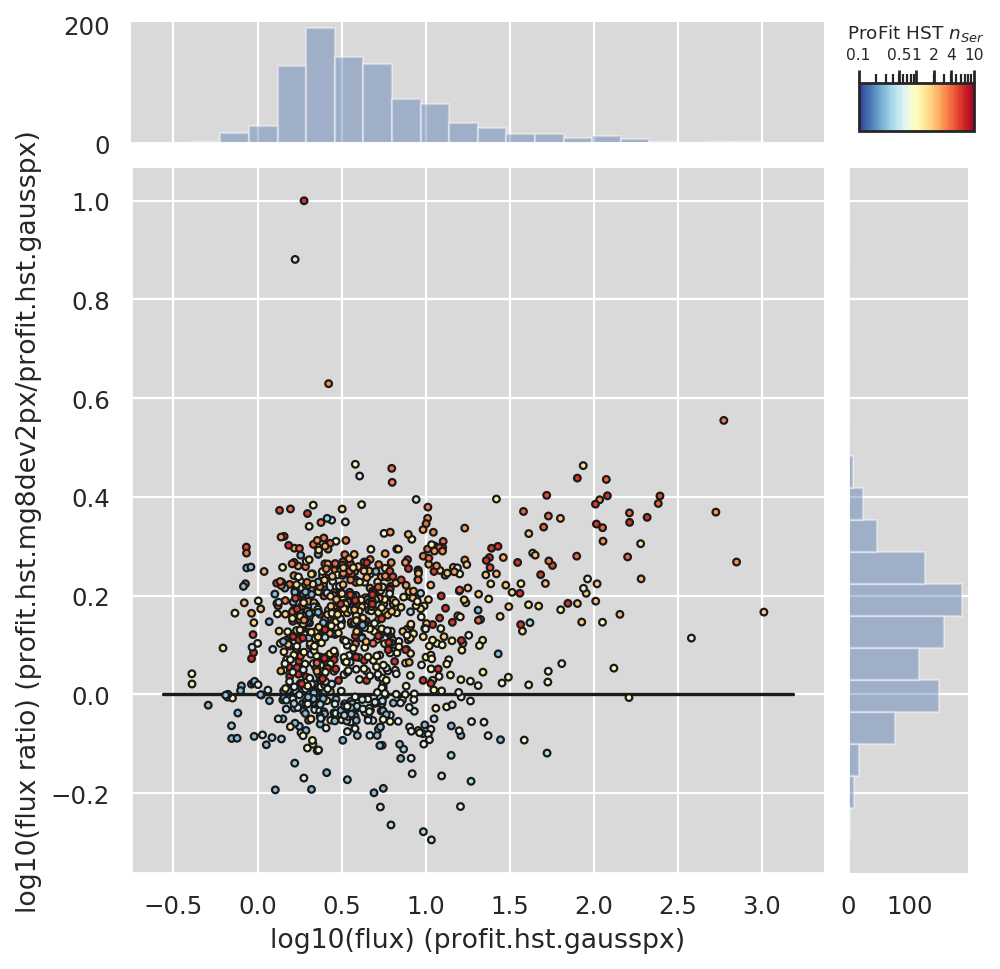

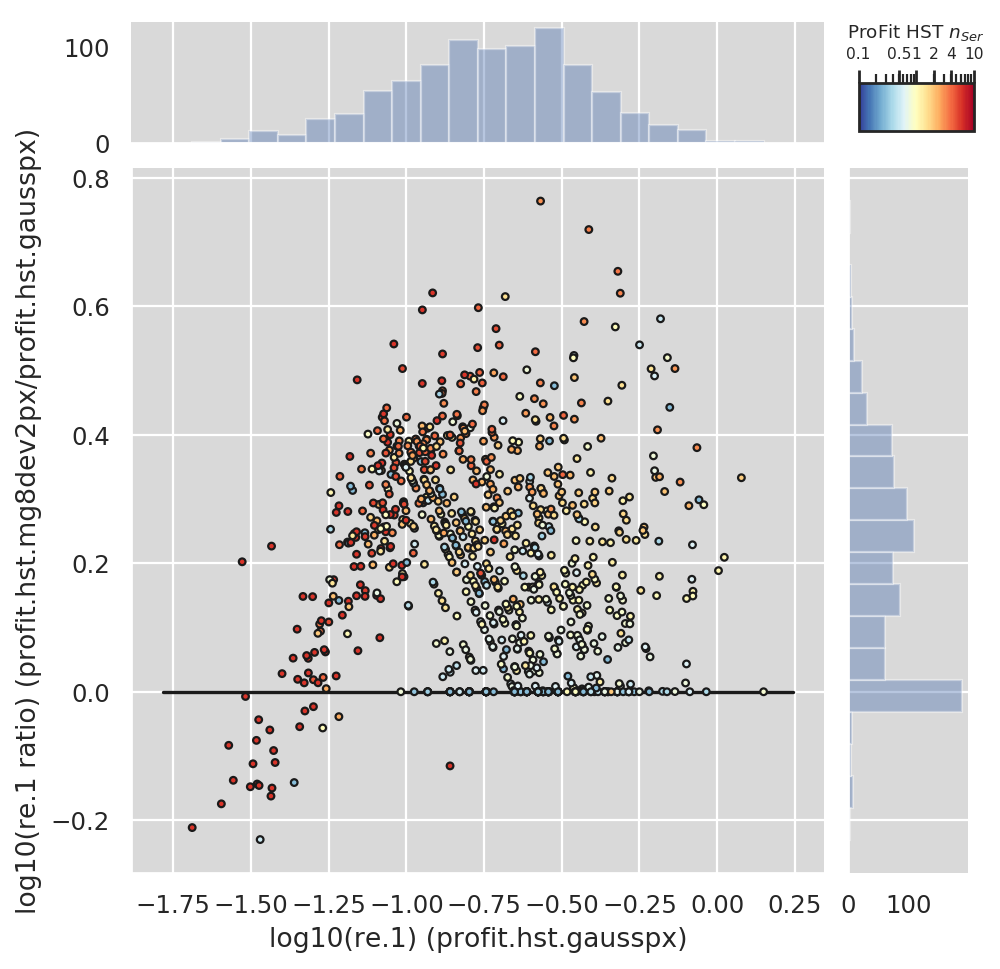

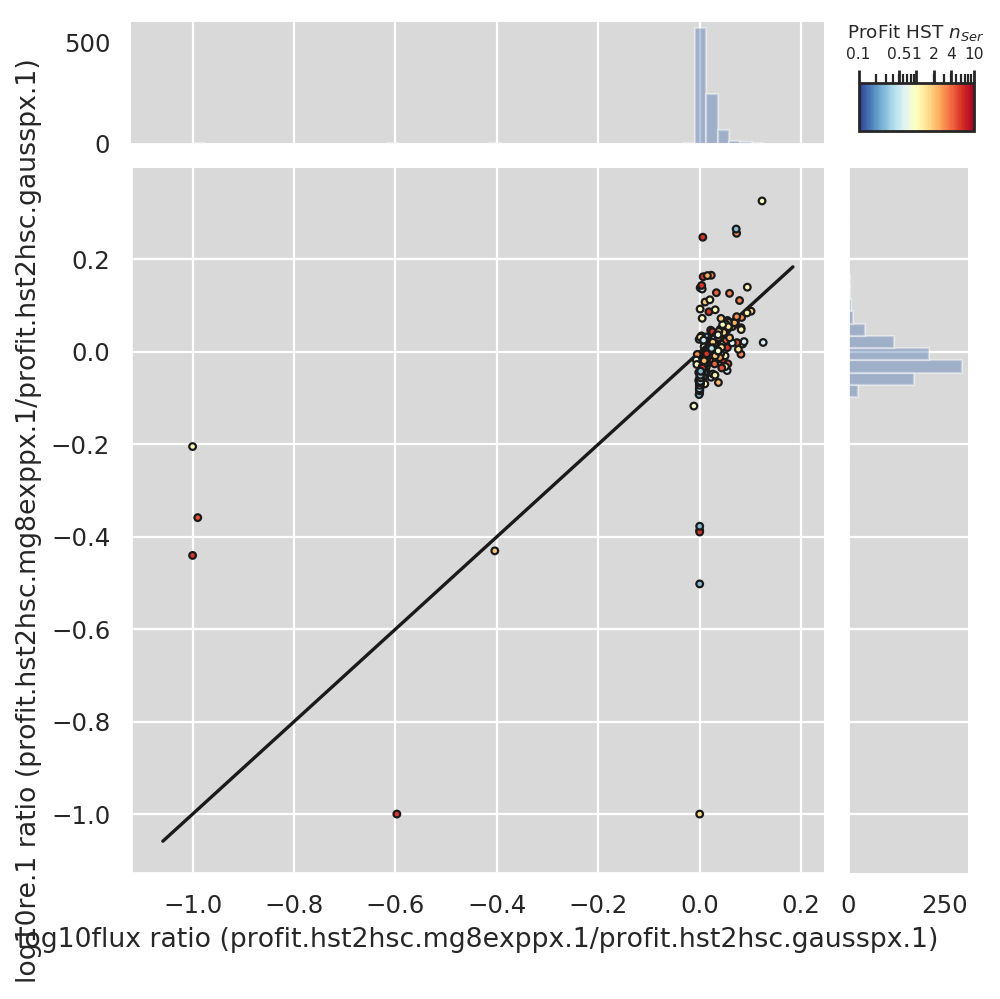

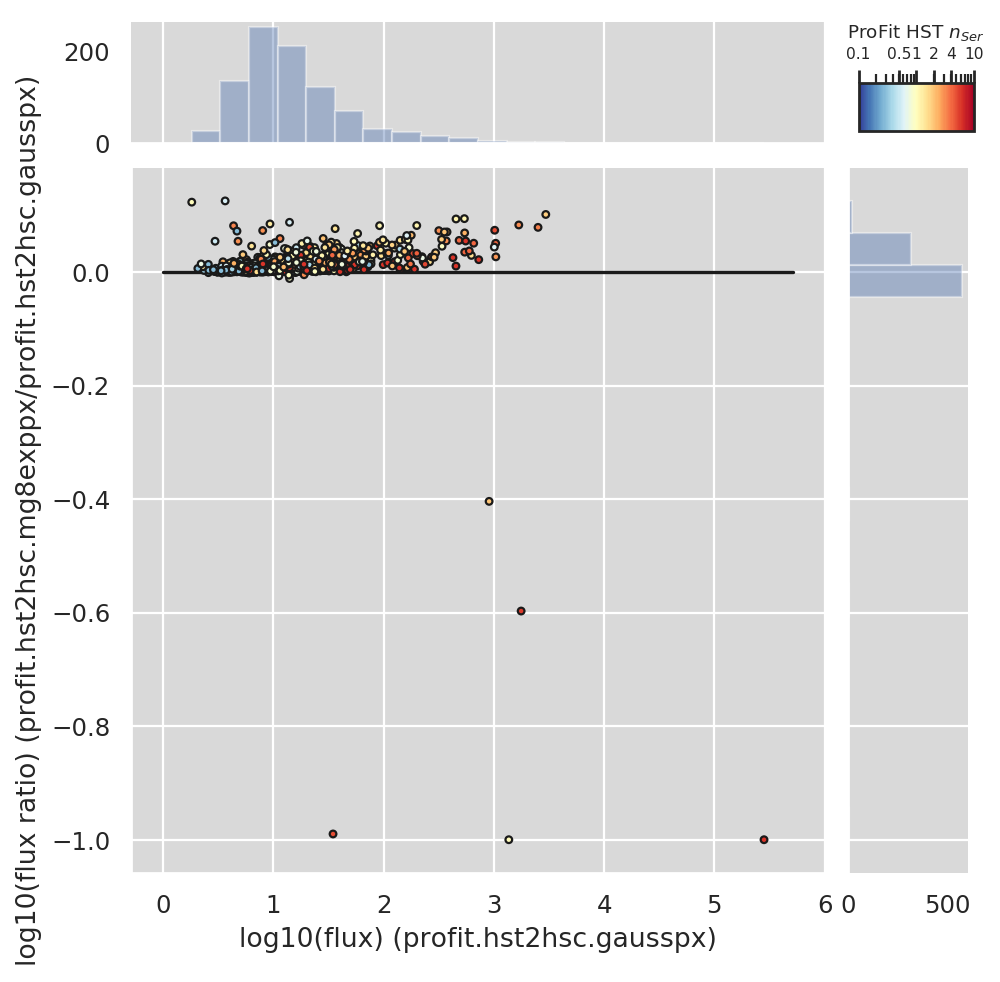

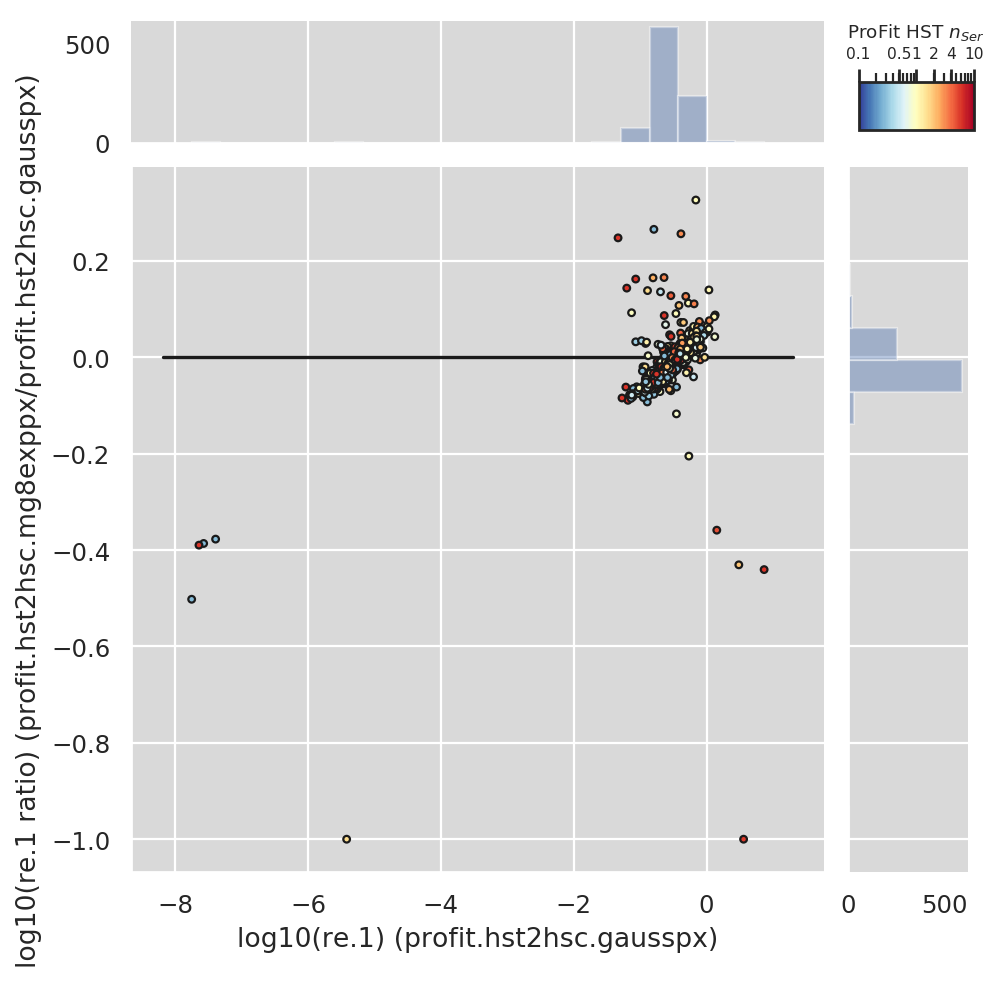

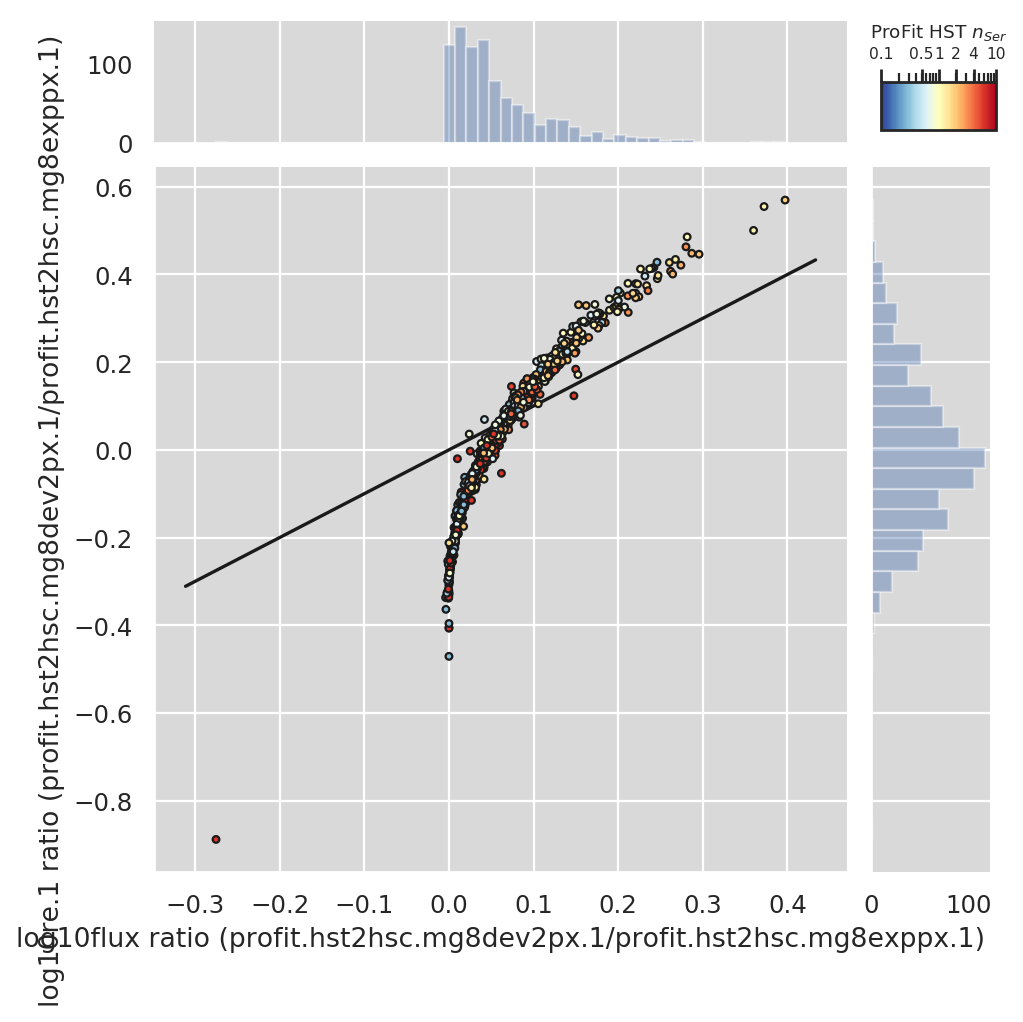

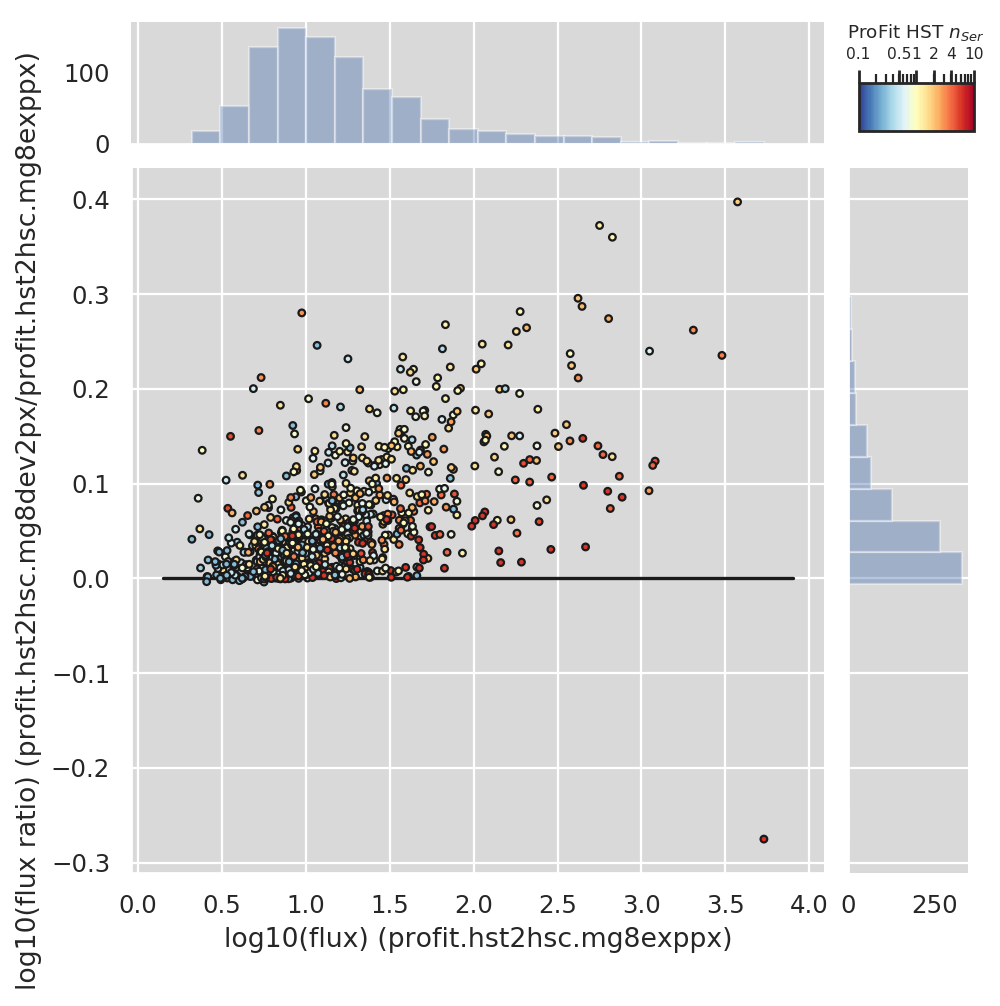

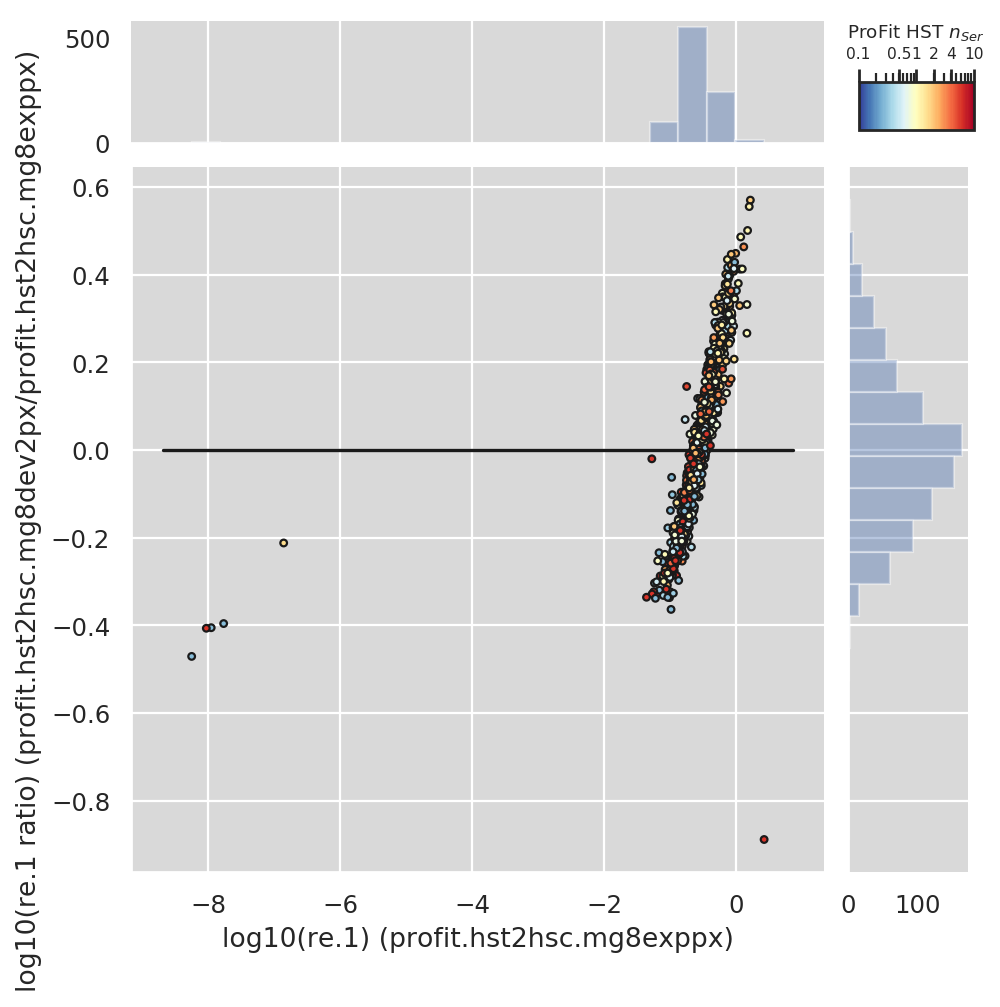

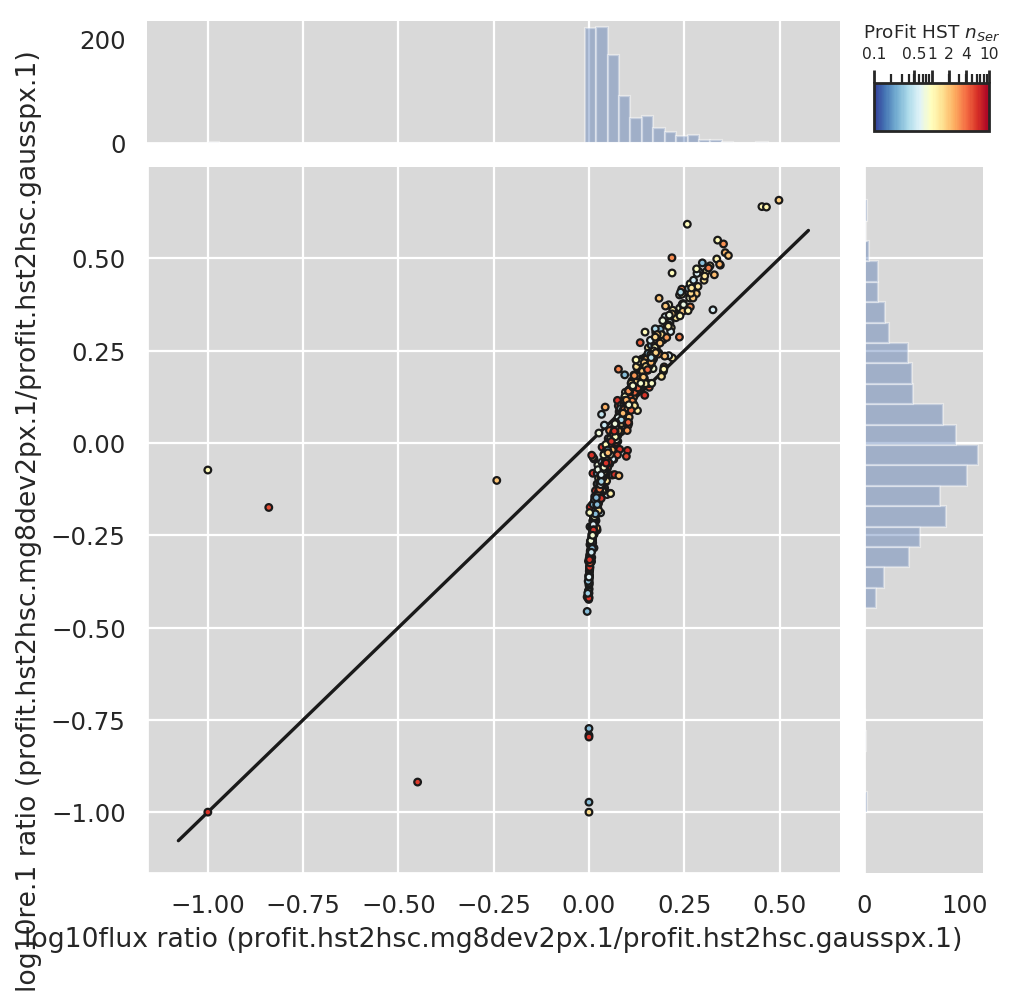

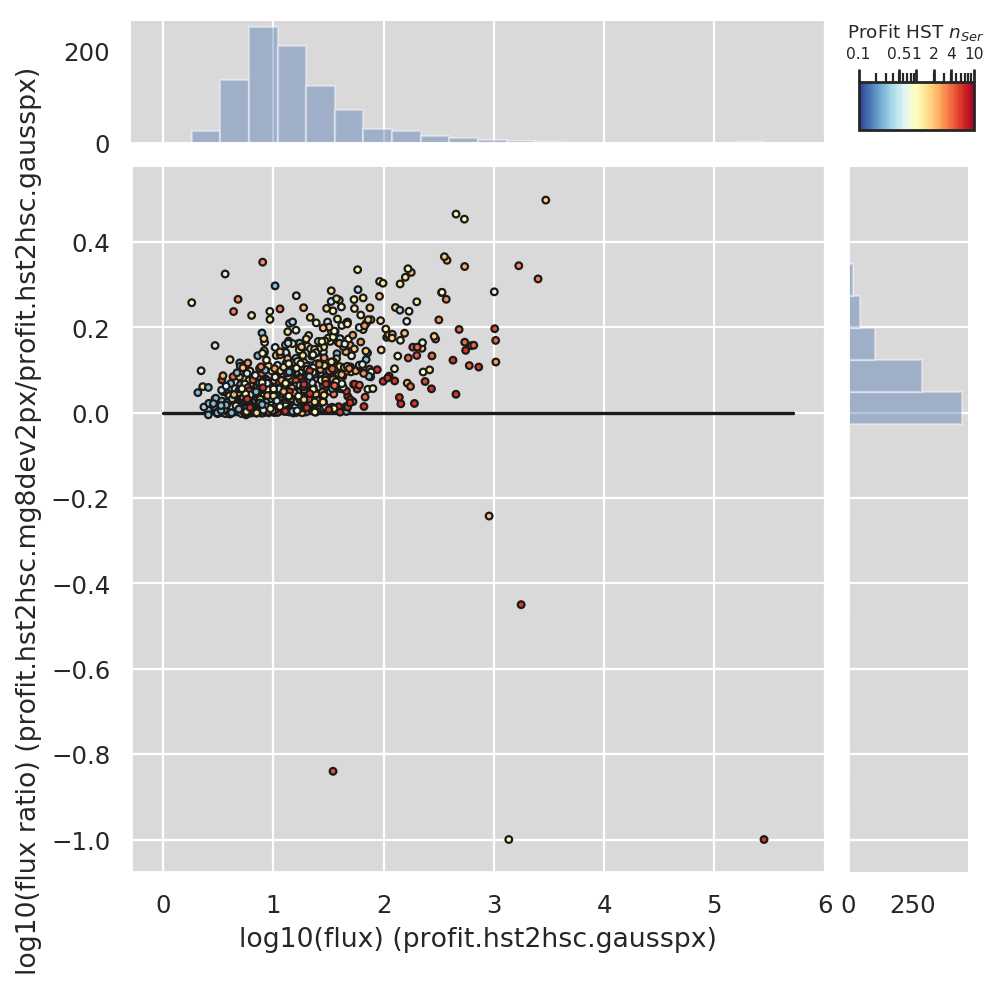

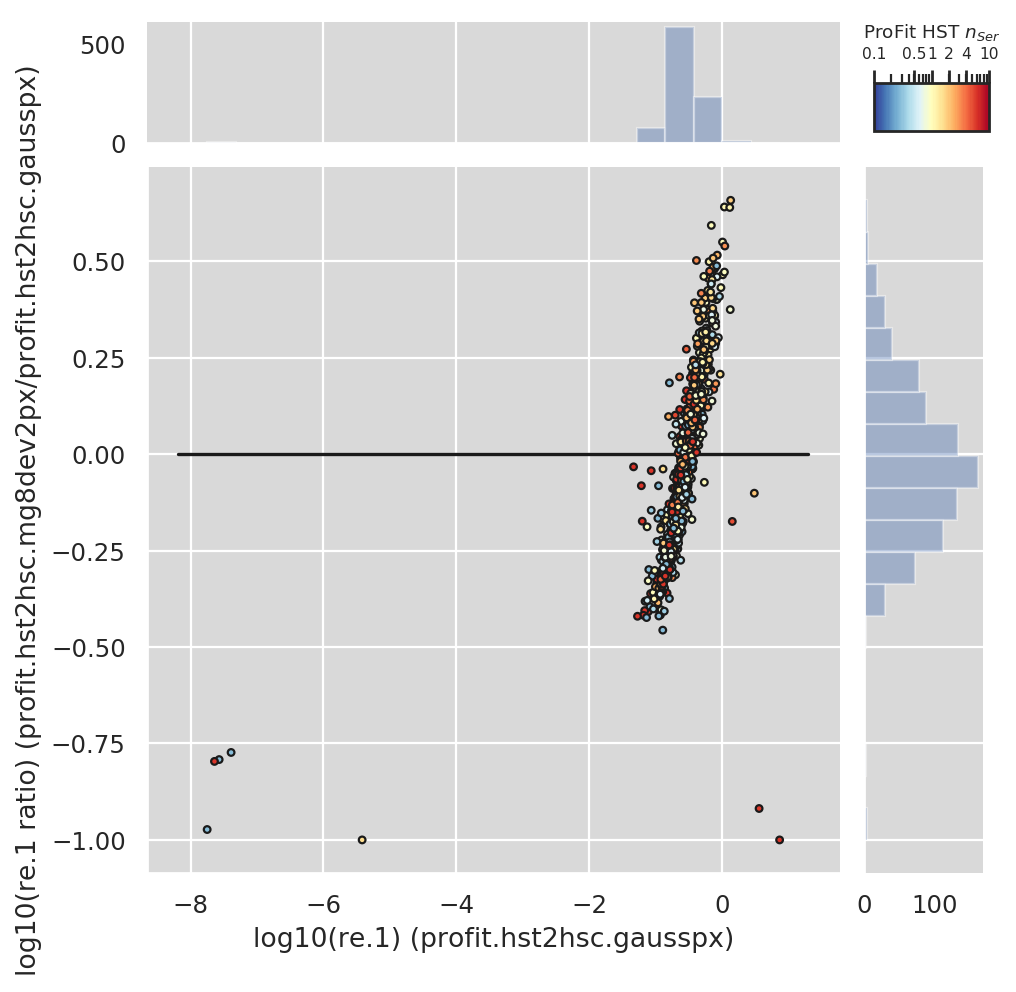

In [7]:
from modelling_research.plot_multiprofit_cosmos import plotjointsersic
varnames = ["flux", "re.1"]
for src in ['hst', 'hst2hsc']:
    plotjointsersic(tab, 'profit.' + src + '.gausspx', 'profit.' + src + '.mg8exppx', varnames, plotratiosjoint=True, postfixx='1', postfixy='1')
    plotjointsersic(tab, 'profit.' + src + '.mg8exppx', 'profit.' + src + '.mg8dev2px', varnames, plotratiosjoint=True, postfixx='1', postfixy='1')
    plotjointsersic(tab, 'profit.' + src + '.gausspx', 'profit.' + src + '.mg8dev2px', varnames, plotratiosjoint=True, postfixx='1', postfixy='1')

/home/dtaranu/src/mine/modelling_research/plotting.py:136: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y, out=y)


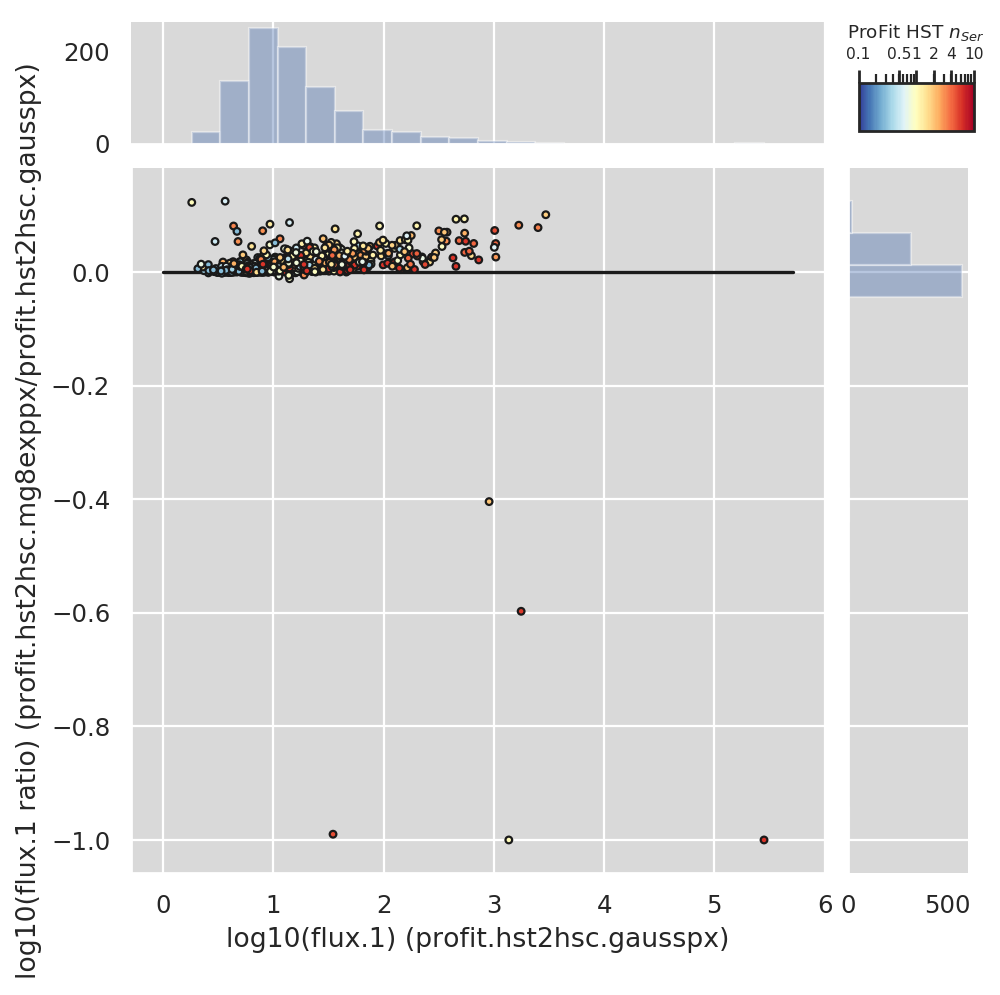

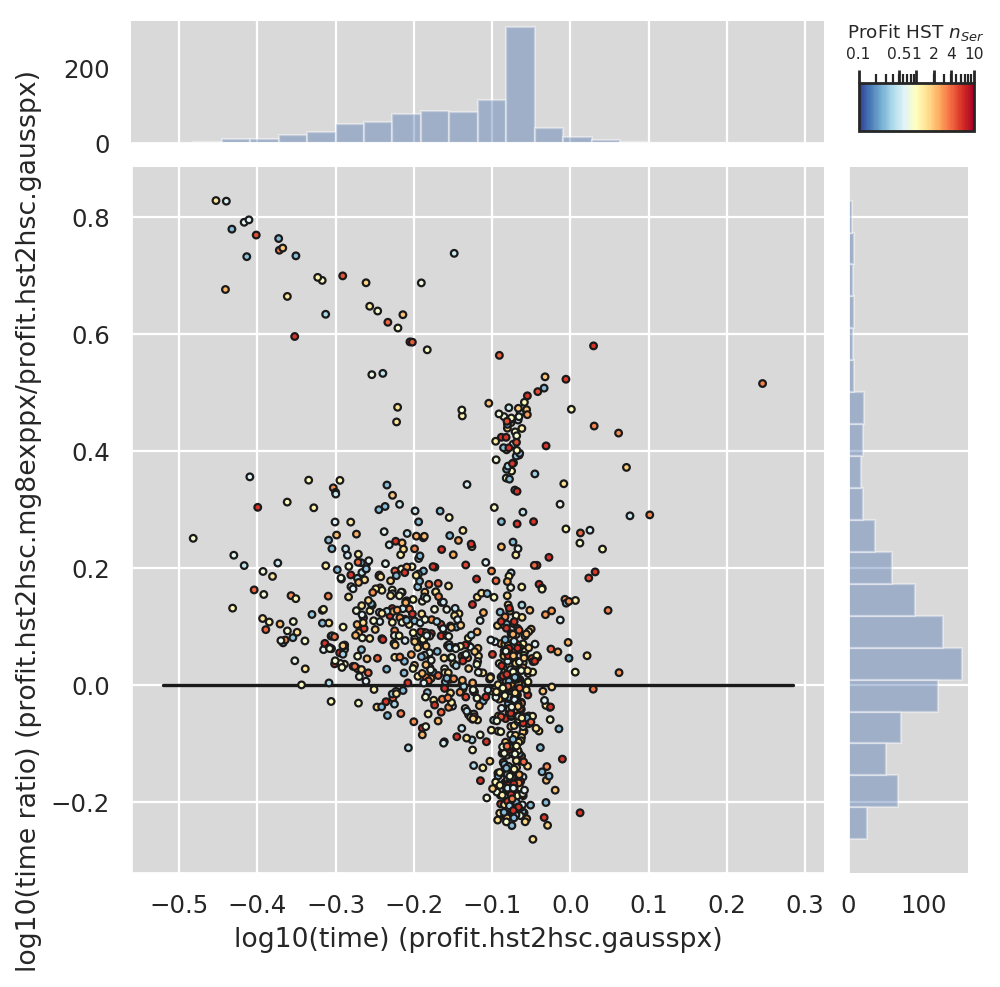

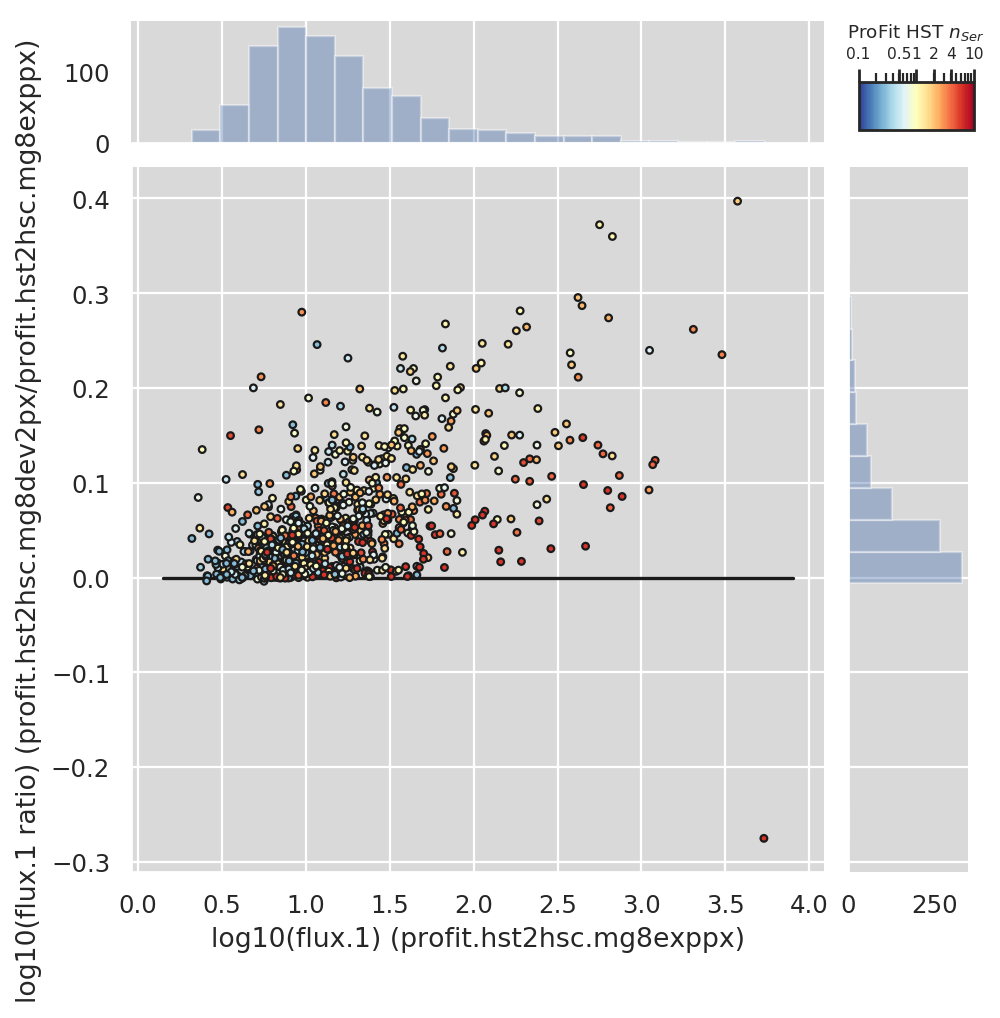

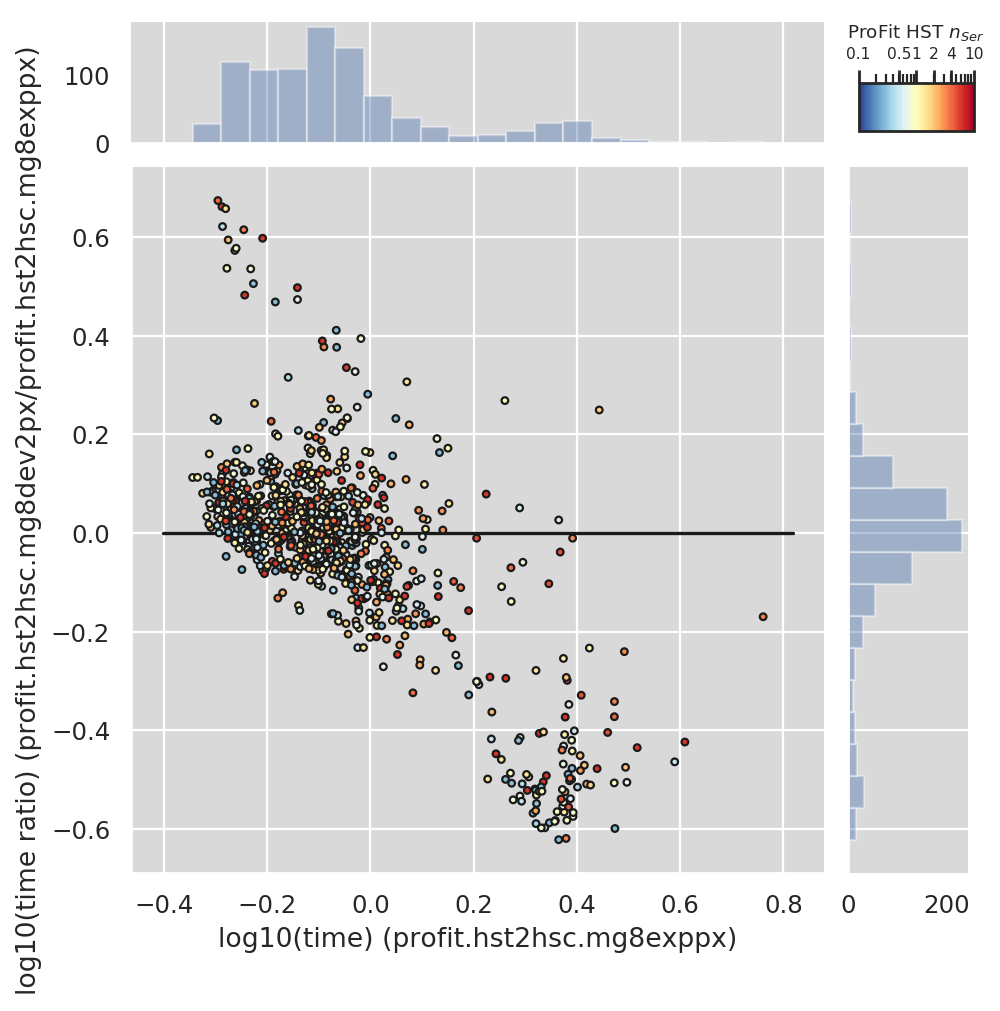

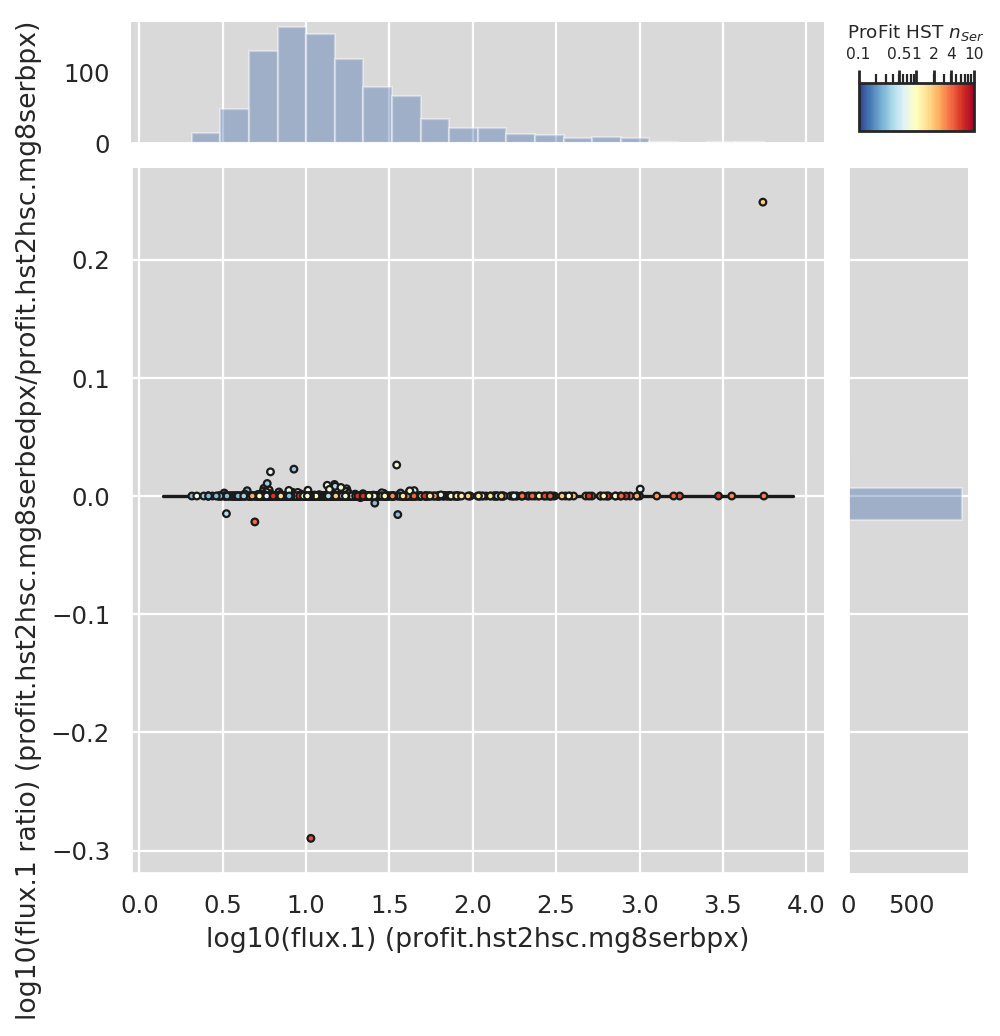

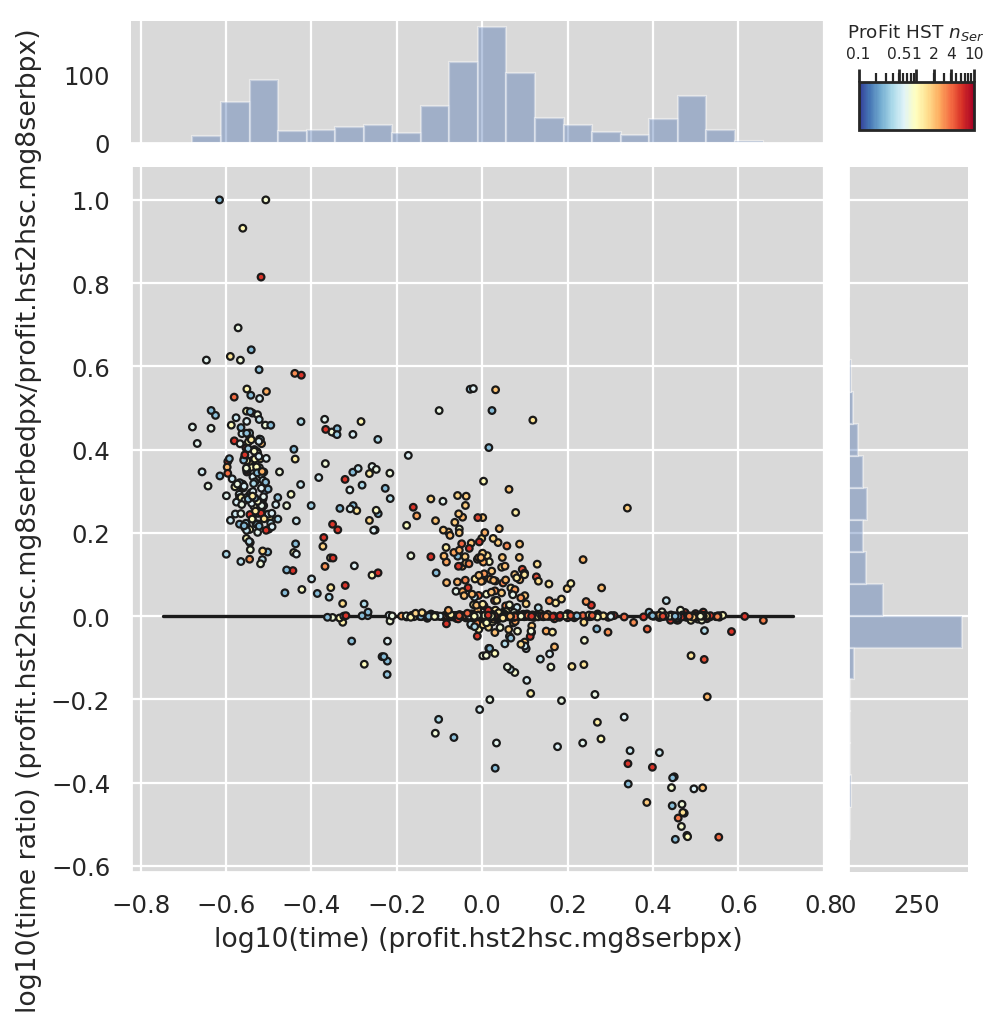

In [6]:
varnamesfit = ["flux.1", "time"]
plotjointsersic(tab, 'profit.hst2hsc.gausspx', 'profit.hst2hsc.mg8exppx', varnamesfit, plotratiosjoint=False)
plotjointsersic(tab, 'profit.hst2hsc.mg8exppx', 'profit.hst2hsc.mg8dev2px', varnamesfit, plotratiosjoint=False)
plotjointsersic(tab, 'profit.hst2hsc.mg8serbpx', 'profit.hst2hsc.mg8serbedpx', varnamesfit, plotratiosjoint=False)

### Multi-band COSMOS-HSC
Todo (DM-17466). It has been tested on a handful of galaxies using gri data, but not yet all five bands or on a substantial sample. It's fairly computationally expensive, especially for GMMs with free weights since they have one flux per band.